# Analyzing Text

Write the TextAnalyzer class in the cell below. We have already imported some libraries that should be useful to you.

In [1]:
import requests, re
from bs4 import BeautifulSoup
from collections import Counter
import statistics as stats
import string
import pandas as pd
%matplotlib inline
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)


# create your class here
class TextAnalyzer:
    """Reads a source: url, text file or string obj and provides methods 
    and properties as well as plots to analyze the distributions of words
    and characters in the text of the source file.

    Keyword arguments:
    src (obj) -- a url path, text file or string obj to analyze.
    src_type -- source type. Options are: url, path to text file, text 
    string contained in program or discover method to determine source
    type."""

    def __init__(self, src, src_type=None):
        """Creates object from source file to analyze text.
        
        Keyword arguments:
        src (str) -- URL, path to text file or string containing text.
        src_type (str) -- file type of input source (URL, path to text
        file, string containing text or None to call discover method)."""
        self._src = src
        self._src_type = src_type
        self._orig_content = None
        self._content = None
        if self._src_type is None:
            print(f'Source type not specified. Use discover() method to determine src_type.')
            self._src_type = self.discover()
            self.fetch_by_src_type(self._src_type)
        else:
            pass
        self.fetch_by_src_type(self._src_type)

    
    def discover(self):
        """Determines if source object is an html file, text file or
        text string.
        
        Grader: 'You could have set a local variable in discover and
        returned it."""
        if self._src.startswith('http'):
            _src_type = 'url'
        elif self._src.endswith('txt'):
            _src_type = 'path'
        else:
            _src_type = 'text'
        print(f'src_type from discover() method is {_src_type}.')
        return _src_type
        # self.fetch_by_src_type(self._src_type)
        

    def fetch_by_src_type(self, src_type):  # Do I really need to pass src_type into fetch?
        """Method using src_type to determine how to read the source file.
        
        Keyword arguments: src_type (str) -- URL, path to text file or 
        text string.
        
        Grader: Your fetch_by_src_type() method returns a value, but that 
        returned value is never used."""
        self._src_type = src_type
        # select correct read method for source type
        if self._src_type == 'url':
            headers = {'user-agent': 'my-app/0.0.1'}
            req = requests.get(self._src, headers=headers)
            self._orig_content = req.text
            self._content = self._orig_content
        elif self._src_type == 'path':
            with open(self._src, 'r') as f:
                self._content = f.read()
        elif self._src_type == 'text':
            self._content = self._src
        else:
            print('Supported source types: URL, text files and text strings.')
        
        
    @property
    def orig_content(self):
        """Property to directly access results from fetch_by_src_type
        method."""
        return self._orig_content

    
    def set_content_to_tag(self, tag='div', tag_id='content-main'):
        """Method uses beautiful soup library to parse HTML for a given
        tag and id after call to fetch_by_src_type(src_type='url). 
        Throws ValueError exception if tag not found. 
        Method is only used if src_type is URL.

        Keyword arguments:
        tag('str') -- HTML tag name
        tag_id('str') -- HTML tag id
        
        Grader: return a value but it is never used."""
        self._tag = tag
        self._tag_id = tag_id
        if self._tag != tag or self._tag_id != tag_id:
            print('Calling reset_content()')
            self.reset_content()
        else:
            try:
                # create beautiful soup object for tag and id
                soup = BeautifulSoup(self._content, 'html.parser')
                # get text and assign to _content attribute
                _content = soup.find(tag, {'id': tag_id}).get_text()
                self._content = _content
                # print(self._content)
            except ValueError:
                # raise exception of tag or tag_id is not found
                if tag is None or tag_id is None:
                    print(f"Tag {tag} or Tag_id {tag_id} is not found.")

    
    def reset_content(self):
        """Reset _content attribute to _orig_content fetched by requests
        module. Useful after call to set_content_to_tag method, e.g. if
        you want to use a different tag or id to analyze the same URL.
        
        Use when you want to create a new beautiful soup object based on
        a new tag or tag id using set_content_to_tag method. Saves call
        to requests module since html content is already in
        _orig_content attribute.
        
        Grader: return a value but it is never used."""
        if self._src_type == 'url':
            self._content = self._orig_content
            # confirm reset to _orig_content
            print('confirm reset_content: ', self._content[0])
            return self._content
        else:
            print(f'Source type {self._src_type} is not a URL.')
  
    def _words(self, casesensitive=False):
        """If casesensitive=False: returns list of words in upper case.
        If casesensitive=True: returns list of words from _orig_content.
        Returns list of words.
        
        Keyword arguments: 
        casesensitive (bool) -- Returns uppercase words if False
        (default).
        
        Grader: I've corrected your words method."""
        if casesensitive is False:
            words = [word.strip(string.punctuation).upper() for word in self._content.split()]  # from Grader
        else:
            words = [word.strip(string.punctuation) for word in self._content.split()]
        # print('_words(): self._content:\n', self._content)
        return words  # self._content
    
    
    def common_words(self, minlen=1, maxlen=100, count=10, casesensitive=False):
        """Returns list of 2-element tuples in the format: (word: num)
        where num is a count of word occurences in the content obtained
        from the _words method using Counter().most_common() method
        from collections module.
        
        Keyword arguments:
        minlen (int) -- Minimum length for word to be included.
        maxlen (int) -- Maximum length for word to be included.
        count (int) -- Number of words to include in the results.
        casesensitive (bool) -- Returns uppercase words if False
        (default)."""
        self.minlen = minlen
        print('self.minlen:', self.minlen)
        self.maxlen = maxlen
        print('self.maxlen:', self.maxlen)
        self.count = count
        print('self.count:', self.count)
        self.casesensitive = casesensitive
        print('self.casesensitive:', self.casesensitive)
        _word_list = []
        if casesensitive is False:
            _word_list = [w.upper() for w in self.words if (len(w) >= self.minlen) & (len(w) <= self.maxlen)]
            # print('self.words: casesensitive is False\n', _word_list)
        else:
            _word_list = [w for w in self.words if (len(w) >= self.minlen) & (len(w) <= self.maxlen)]
            # print('_word_list: casesensitive is True\n', _word_list)
        # use Counter from collections module
        cnt = Counter(_word_list)
        return cnt.most_common(count)

    def plot_common_words(self, minlen=1, maxlen=100, count=10, casesensitive=False):
        """Plots distribution of most common words in a bar chart from
        matplotlib module.
        
        Keyword arguments:
        minlen (int) -- Minimum length for word to be included.
        maxlen (int) -- Maximum length for word to be included.
        count (int) -- Number of words to include in the results.
        casesensitive (bool) -- Returns uppercase words if False
        (default)."""
        self.minlen = minlen
        print('self.minlen:', self.minlen)
        self.maxlen = maxlen
        print('self.maxlen:', self.maxlen)
        self.count = count
        print('self.count:', self.count)
        self.casesensitive = casesensitive
        print('self.casesensitive:', self.casesensitive)
        # convert list into DF
        df_cw = pd.DataFrame(self.common_words(self.minlen, self.maxlen, self.count, self.casesensitive))
        print('df_cw shape is: ', df_cw.shape)
        df_cw.columns = ['Word', 'Count']
        df_cw.index = df_cw['Word']
        # print(df_cw)
        plt_words = df_cw.plot(kind='bar',
                               title='Common Words',
                               figsize=(12, 6),
                               width=.8,
                               fontsize=16)
        plt_words.set_ylabel('Word', fontsize=20)
        plt_words.set_xlabel('Count', fontsize=20)
        plt_words.grid(True)

    def char_distribution(self, casesensitive=False, letters_only=False):
        """Returns a list of 2 element tuples (char, num) where char is
        character and num is the count of char.
        
        Keyword arguments:
        casesensitive (bool) -- Returns uppercase words if False
        (default).
        letters_only (bool) -- Includes alpha characters only if True."""
        # re for selecting only alpha chars for letters_only=True
        notalpha = re.compile('[^a-zA-Z]')
        _chars_only = notalpha.sub('', self._content.rstrip('\n'))
        if not casesensitive and not letters_only:
            _chars_clean = [char.upper() for char in self._content]
        elif casesensitive and not letters_only:
            _chars_clean = [char for char in self._content]
        elif not casesensitive and letters_only:
            _chars_clean = [char.strip(string.punctuation).upper() for char in _chars_only]
        elif casesensitive and letters_only:
            _chars_clean = [char.strip(string.punctuation) for char in _chars_only]
        else:
            _chars_clean = []
        # use Counter from collections module
        cnt_chars = Counter(_chars_clean)
        char_dist = cnt_chars.most_common()  # [(char, num)]
        # print('char_dist:\n', char_dist)
        char_dist_sorted = sorted(char_dist, key=lambda x: x[1], reverse=False)
        print('char_dist_sorted:\n', char_dist_sorted)
        return char_dist

    def plot_char_distribution(self, casesensitive=False, letters_only=False):
        """Plots distribution of most common characters in a bar chart
        from matplotlib module.
        
        Keyword arguments:
        casesensitive (bool) -- Returns uppercase words if False
        (default).
        letters_only (bool) -- Includes alpha characters only if True."""
        # convert list into DF
        df_cd = pd.DataFrame(self.char_distribution(casesensitive, letters_only))
        df_cd.columns = ['Character', 'Count']
        df_cd.index = df_cd['Character']
        # print(df_cd)
        plt_chars = df_cd.plot(kind='bar',
                               title='Character Distribution',
                               figsize=(12, 6),
                               width=.8,
                               fontsize=16)
        plt_chars.set_ylabel('Character', fontsize=20)
        plt_chars.set_xlabel('Count', fontsize=20)
        plt_chars.grid(True)

    @property
    def avg_word_length(self):
        """Calculates the average word length in content."""
        _avg_word_length = sum([len(_w) for _w in self.words]) / len(self._words())
        # print(f'The average word length is {_avg_word_length:.2f} characters.')
        return round(_avg_word_length, 2)

    @property
    def word_count(self):
        """Number words in content."""
        # print(f'Total word count: {len(self._words()):,}')
        return len(self._words())

    @property
    def distinct_word_count(self):
        """Number of distinct words in content."""
        # print(f'Distinct word count: {len(set(self._words())):,}')
        return len(set(self._words()))

    @property
    def words(self):
        """List of all words in content, including repeats, in UPPERCASE."""
        return self._words(casesensitive=False)

    @property
    def positivity(self):
        """Calculate positivity score defined as difference between the
        number of words in a text that match a positive word corpus vs.
        the number of words that match a negative word corpus.
        Positivity score calculation:
        Initialize local var tally to 0.
        Increment tally by 1 for every word match in positive.txt.
        Decrement tally by 1 for every word match in negative.txt.
        Final positivity score:
            round( tally / self.word_count * 1000)"""
        # 1. read and parse positive word file 'positive.txt' into list
        with open('positive.txt', 'r') as _f:
            # f.read().strip(string.punctuation)
            _pdoc = _f.readlines()  # .strip(string.punctuation)
            pos_words = []
        for word in _pdoc:
            pos_words = [word.strip(string.punctuation).rstrip('\n').upper() for word in _pdoc]
            # print('pos_words:\n', pos_words)
        print(f'# of words in positive.txt is {len(pos_words):,}')
        # dedup word list with set
        print(f'# of distinct words in positive.txt is {len(set(pos_words)):,}\n')
        # 2. read and parse negative word file 'negative.txt' into list
        with open('negative.txt', 'r') as _f:
            _ndoc = _f.readlines()
            neg_words = []
        for word in _ndoc:
            neg_words = [word.strip(string.punctuation).rstrip('\n').upper() for word in _ndoc]
            # print('neg_words:\n', neg_words)
        print(f'# of words in negative.txt is {len(neg_words):,}')
        # create distinct word list with set
        print(f'# of distinct words in negative.txt is {len(set(neg_words)):,}\n')
        # 3. calculate positivity score based on pos/neg word matches
        _matches = []
        _tally = 0
        _pos = 0
        _neg = 0
        _words = self.words
        for _w in _words:
            for _p in pos_words:
                if _w == _p:
                    _pos += 1
                    _tally += 1
                    _matches.append((_w, _p, _tally))
            for _n in neg_words:
                if _w == _n:
                    _neg += 1
                    _tally -= 1
                    _matches.append((_w, _n, _tally))
        print(f'# of positive matches: {_pos:,}')
        print(f'# of negative matches: {_neg:,}')
        print(f'Tally of positive - negative matches: {_tally:,}')
        # print(f'Check: Positive - Negative Matches (should equal tally: {(_pos - _neg):,}')
        print(f'% positive matches: {_pos / (_pos + _neg):.1%}')
        # _word_count = int(self.word_count)
        _positivity = round(_tally / self.word_count * 1000)
        print('Positivity score: ', '{:,}'.format(_positivity))
        return _positivity


In [ ]:
# use dir(class) to see what methods are available in the class
dir(TextAnalyzer)

In [2]:
# test and debug class
url = 'https://www.webucator.com/how-to/address-by-bill-clinton-1997.cfm'
path = 'pride-and-prejudice.txt'
text = '''The outlook wasn't brilliant for the Mudville Nine that day;
the score stood four to two, with but one inning more to play.
And then when Cooney died at first, and Barrows did the same,
a sickly silence fell upon the patrons of the game.'''
ta = TextAnalyzer(url, src_type='url')

In [ ]:
# use __dict__ to check the state of an instance to debug
ta.__dict__

In [ ]:
ta.reset_content()

In [3]:
ta.set_content_to_tag('div','content-main')

In [ ]:
ta.__dict__

In [4]:
ta._words()

['ADDRESS',
 'BY',
 'BILL',
 'CLINTONMY',
 'FELLOW',
 'CITIZENS:AT',
 'THIS',
 'LAST',
 'PRESIDENTIAL',
 'INAUGURATION',
 'OF',
 'THE',
 '20TH',
 'CENTURY',
 'LET',
 'US',
 'LIFT',
 'OUR',
 'EYES',
 'TOWARD',
 'THE',
 'CHALLENGES',
 'THAT',
 'AWAIT',
 'US',
 'IN',
 'THE',
 'NEXT',
 'CENTURY',
 'IT',
 'IS',
 'OUR',
 'GREAT',
 'GOOD',
 'FORTUNE',
 'THAT',
 'TIME',
 'AND',
 'CHANCE',
 'HAVE',
 'PUT',
 'US',
 'NOT',
 'ONLY',
 'AT',
 'THE',
 'EDGE',
 'OF',
 'A',
 'NEW',
 'CENTURY',
 'IN',
 'A',
 'NEW',
 'MILLENNIUM',
 'BUT',
 'ON',
 'THE',
 'EDGE',
 'OF',
 'A',
 'BRIGHT',
 'NEW',
 'PROSPECT',
 'IN',
 'HUMAN',
 'AFFAIRS',
 'A',
 'MOMENT',
 'THAT',
 'WILL',
 'DEFINE',
 'OUR',
 'COURSE',
 'AND',
 'OUR',
 'CHARACTER',
 'FOR',
 'DECADES',
 'TO',
 'COME',
 'WE',
 'MUST',
 'KEEP',
 'OUR',
 'OLD',
 'DEMOCRACY',
 'FOREVER',
 'YOUNG',
 'GUIDED',
 'BY',
 'THE',
 'ANCIENT',
 'VISION',
 'OF',
 'A',
 'PROMISED',
 'LAND',
 'LET',
 'US',
 'SET',
 'OUR',
 'SIGHTS',
 'UPON',
 'A',
 'LAND',
 'OF',
 'NEW',
 'P

In [5]:
ta.words

['ADDRESS',
 'BY',
 'BILL',
 'CLINTONMY',
 'FELLOW',
 'CITIZENS:AT',
 'THIS',
 'LAST',
 'PRESIDENTIAL',
 'INAUGURATION',
 'OF',
 'THE',
 '20TH',
 'CENTURY',
 'LET',
 'US',
 'LIFT',
 'OUR',
 'EYES',
 'TOWARD',
 'THE',
 'CHALLENGES',
 'THAT',
 'AWAIT',
 'US',
 'IN',
 'THE',
 'NEXT',
 'CENTURY',
 'IT',
 'IS',
 'OUR',
 'GREAT',
 'GOOD',
 'FORTUNE',
 'THAT',
 'TIME',
 'AND',
 'CHANCE',
 'HAVE',
 'PUT',
 'US',
 'NOT',
 'ONLY',
 'AT',
 'THE',
 'EDGE',
 'OF',
 'A',
 'NEW',
 'CENTURY',
 'IN',
 'A',
 'NEW',
 'MILLENNIUM',
 'BUT',
 'ON',
 'THE',
 'EDGE',
 'OF',
 'A',
 'BRIGHT',
 'NEW',
 'PROSPECT',
 'IN',
 'HUMAN',
 'AFFAIRS',
 'A',
 'MOMENT',
 'THAT',
 'WILL',
 'DEFINE',
 'OUR',
 'COURSE',
 'AND',
 'OUR',
 'CHARACTER',
 'FOR',
 'DECADES',
 'TO',
 'COME',
 'WE',
 'MUST',
 'KEEP',
 'OUR',
 'OLD',
 'DEMOCRACY',
 'FOREVER',
 'YOUNG',
 'GUIDED',
 'BY',
 'THE',
 'ANCIENT',
 'VISION',
 'OF',
 'A',
 'PROMISED',
 'LAND',
 'LET',
 'US',
 'SET',
 'OUR',
 'SIGHTS',
 'UPON',
 'A',
 'LAND',
 'OF',
 'NEW',
 'P

In [6]:
ta.common_words(minlen=5, maxlen=10, count=15, casesensitive=False)

self.minlen: 5
self.maxlen: 10
self.count: 15
self.casesensitive: False


[('CENTURY', 18),
 ('NATION', 11),
 ('PEOPLE', 11),
 ('GOVERNMENT', 11),
 ('EVERY', 11),
 ('AMERICA', 9),
 ('AMERICAN', 9),
 ('PROMISE', 8),
 ('WORLD', 8),
 ('THOSE', 8),
 ('GREAT', 6),
 ('AGAIN', 6),
 ('AMERICANS', 6),
 ('CITIZENS', 6),
 ('ENOUGH', 6)]

self.minlen: 5
self.maxlen: 10
self.count: 15
self.casesensitive: False
self.minlen: 5
self.maxlen: 10
self.count: 15
self.casesensitive: False
df_cw shape is:  (15, 2)


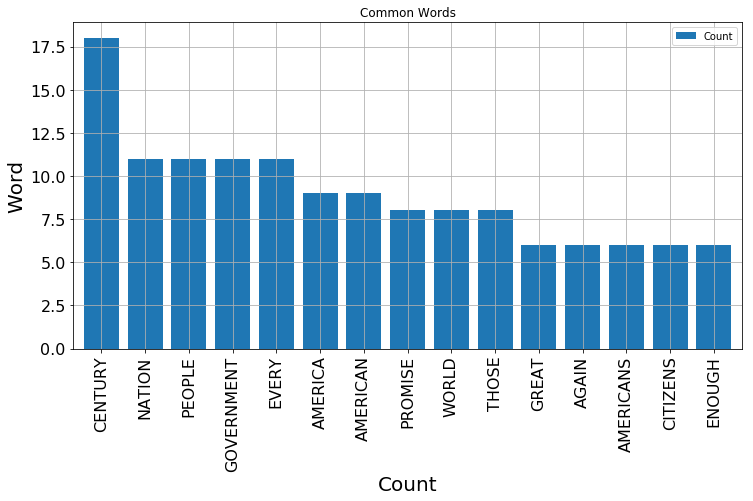

In [7]:
ta.plot_common_words(minlen=5, maxlen=10, count=15, casesensitive=False)

In [8]:
print(f'Average word length: {ta.avg_word_length}')

Average word length: 4.65


In [9]:
print(f'Word count: {ta.word_count:,}')

Word count: 2,111


In [10]:
print(f'Distinct word count: {ta.distinct_word_count:,}')

Distinct word count: 757


In [11]:
ta.char_distribution(casesensitive=False, letters_only=False)

char_dist_sorted:
 [('8', 1), ('4', 1), ('…', 1), ('9', 2), ('-', 2), ('\n', 3), ('0', 3), ('?', 3), ('“', 3), ('”', 3), ('Q', 5), ('2', 6), ('1', 6), (';', 7), (':', 8), ('X', 9), ('—', 9), ('Z', 12), ('J', 12), ('’', 13), ('K', 37), ('.', 106), ('V', 118), ('B', 121), (',', 147), ('Y', 158), ('P', 177), ('G', 184), ('F', 228), ('W', 236), ('M', 270), ('U', 299), ('C', 311), ('D', 375), ('L', 433), ('H', 440), ('S', 568), ('I', 622), ('R', 678), ('N', 721), ('A', 748), ('O', 830), ('T', 860), ('E', 1270), (' ', 2110)]


[(' ', 2110),
 ('E', 1270),
 ('T', 860),
 ('O', 830),
 ('A', 748),
 ('N', 721),
 ('R', 678),
 ('I', 622),
 ('S', 568),
 ('H', 440),
 ('L', 433),
 ('D', 375),
 ('C', 311),
 ('U', 299),
 ('M', 270),
 ('W', 236),
 ('F', 228),
 ('G', 184),
 ('P', 177),
 ('Y', 158),
 (',', 147),
 ('B', 121),
 ('V', 118),
 ('.', 106),
 ('K', 37),
 ('’', 13),
 ('Z', 12),
 ('J', 12),
 ('X', 9),
 ('—', 9),
 (':', 8),
 (';', 7),
 ('2', 6),
 ('1', 6),
 ('Q', 5),
 ('\n', 3),
 ('0', 3),
 ('?', 3),
 ('“', 3),
 ('”', 3),
 ('9', 2),
 ('-', 2),
 ('8', 1),
 ('4', 1),
 ('…', 1)]

In [12]:
ta.char_distribution(casesensitive=False, letters_only=True)

char_dist_sorted:
 [('Q', 5), ('X', 9), ('Z', 12), ('J', 12), ('K', 37), ('V', 118), ('B', 121), ('Y', 158), ('P', 177), ('G', 184), ('F', 228), ('W', 236), ('M', 270), ('U', 299), ('C', 311), ('D', 375), ('L', 433), ('H', 440), ('S', 568), ('I', 622), ('R', 678), ('N', 721), ('A', 748), ('O', 830), ('T', 860), ('E', 1270)]


[('E', 1270),
 ('T', 860),
 ('O', 830),
 ('A', 748),
 ('N', 721),
 ('R', 678),
 ('I', 622),
 ('S', 568),
 ('H', 440),
 ('L', 433),
 ('D', 375),
 ('C', 311),
 ('U', 299),
 ('M', 270),
 ('W', 236),
 ('F', 228),
 ('G', 184),
 ('P', 177),
 ('Y', 158),
 ('B', 121),
 ('V', 118),
 ('K', 37),
 ('Z', 12),
 ('J', 12),
 ('X', 9),
 ('Q', 5)]

char_dist_sorted:
 [('Q', 5), ('X', 9), ('Z', 12), ('J', 12), ('K', 37), ('V', 118), ('B', 121), ('Y', 158), ('P', 177), ('G', 184), ('F', 228), ('W', 236), ('M', 270), ('U', 299), ('C', 311), ('D', 375), ('L', 433), ('H', 440), ('S', 568), ('I', 622), ('R', 678), ('N', 721), ('A', 748), ('O', 830), ('T', 860), ('E', 1270)]


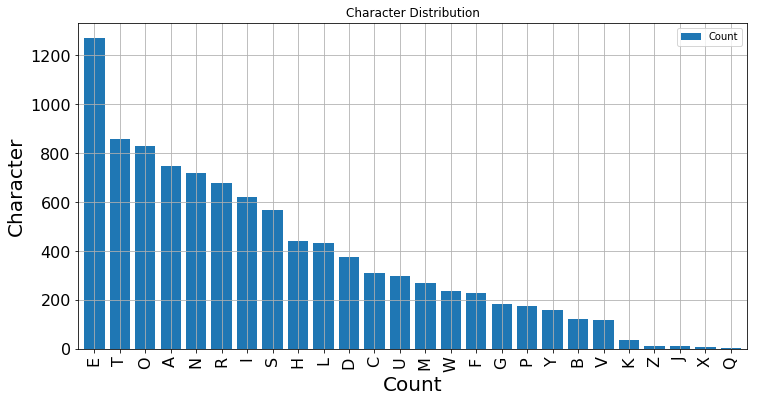

In [13]:
ta.plot_char_distribution(casesensitive=False, letters_only=True)

In [14]:
ta.positivity

# of words in positive.txt is 2,006
# of distinct words in positive.txt is 2,006

# of words in negative.txt is 4,783
# of distinct words in negative.txt is 4,783

# of positive matches: 118
# of negative matches: 44
Tally of positive - negative matches: 74
% positive matches: 72.8%
Positivity score:  35


35

In [ ]:
help(TextAnalyzer)

## Tests
When you have finished, you should run the tests below. If you get errors, you should do your very best to fix those errors before submitting the project.

If you submit your project while still getting errors, you should explain that in your project submission email. The very first thing we will do to grade your project is run it through these tests. If it fails any of the tests, and you have not indicated that you are aware of specific test failures, we will stop grading and ask you to resubmit.

In [15]:
import unittest

url = 'https://www.webucator.com/how-to/address-by-bill-clinton-1997.cfm'
path = 'pride-and-prejudice.txt'
text = '''The outlook wasn't brilliant for the Mudville Nine that day;
the score stood four to two, with but one inning more to play.
And then when Cooney died at first, and Barrows did the same,
a sickly silence fell upon the patrons of the game.'''

class TestTextAnalyzer(unittest.TestCase):
    def test_discover_url(self):
        ta = TextAnalyzer(url)
        self.assertEqual(ta._src_type, 'url')
    def test_discover_path(self):
        ta = TextAnalyzer(path)
        self.assertEqual(ta._src_type, 'path')
    def test_discover_text(self):
        ta = TextAnalyzer(text)
        self.assertEqual(ta._src_type, 'text')
    def test_set_content_to_tag(self):
        ta = TextAnalyzer(url)
        ta.set_content_to_tag('div','content-main')
        self.assertEqual(ta._content[0:25], '\n\nAddress by Bill Clinton')
    def test_reset_content(self):
        ta = TextAnalyzer(url)
        ta.set_content_to_tag('div','content-main')
        ta.reset_content()
        self.assertEqual(ta._content[0], '<')
    def test_common_words(self):
        ta = TextAnalyzer(path, src_type='path')
        common_words = ta.common_words(minlen=5, maxlen=10)
        liz = common_words[0]
        self.assertEqual(liz[0],'ELIZABETH')
    def test_avg_word_length(self):
        ta = TextAnalyzer(text, src_type='text')
        self.assertEqual(ta.avg_word_length, 4.16)
    def test_word_count(self):
        ta = TextAnalyzer(text, src_type='text')
        self.assertEqual(ta.word_count, 45)
    def test_distinct_word_count(self):
        ta = TextAnalyzer(text, src_type='text')
        self.assertEqual(ta.distinct_word_count, 38)
    def test_char_distribution(self):
        ta = TextAnalyzer(text, src_type='text')
        char_dist = ta.char_distribution(letters_only=True)
        self.assertEqual(char_dist[1][1], 20)
    def test_positivity(self):
        ta = TextAnalyzer(text, src_type='text')
        positivity = ta.positivity
        self.assertEqual(positivity, -44)
        
suite = unittest.TestLoader().loadTestsFromTestCase(TestTextAnalyzer)
unittest.TextTestRunner().run(suite)

.....

char_dist_sorted:
 [('V', 1), ('K', 2), ('G', 2), ('B', 3), ('P', 3), ('M', 4), ('Y', 4), ('C', 4), ('U', 5), ('W', 5), ('F', 5), ('S', 9), ('R', 9), ('D', 9), ('H', 10), ('L', 10), ('I', 12), ('A', 13), ('N', 16), ('O', 19), ('E', 20), ('T', 21)]
self.minlen: 5
self.maxlen: 10
self.count: 10
self.casesensitive: False
Source type not specified. Use discover() method to determine src_type.
src_type from discover() method is path.
Source type not specified. Use discover() method to determine src_type.
src_type from discover() method is text.
Source type not specified. Use discover() method to determine src_type.
src_type from discover() method is url.


..

# of words in positive.txt is 2,006
# of distinct words in positive.txt is 2,006



.

# of words in negative.txt is 4,783
# of distinct words in negative.txt is 4,783

# of positive matches: 1
# of negative matches: 3
Tally of positive - negative matches: -2
% positive matches: 25.0%
Positivity score:  -44
Source type not specified. Use discover() method to determine src_type.
src_type from discover() method is url.


.

confirm reset_content:  <
Source type not specified. Use discover() method to determine src_type.
src_type from discover() method is url.


..
----------------------------------------------------------------------
Ran 11 tests in 55.797s

OK


<unittest.runner.TextTestResult run=11 errors=0 failures=0>

## Plots
You should also run the cell below to make sure your plot methods work. They should produce plots that look like the images found at:
* <a href="character-distribution.png" target="image_win">character-distribution.png</a>
* <a href="common-words.png" target="image_win">common-words.png</a>

self.minlen: 5
self.maxlen: 100
self.count: 10
self.casesensitive: False
self.minlen: 5
self.maxlen: 100
self.count: 10
self.casesensitive: False
df_cw shape is:  (10, 2)
char_dist_sorted:
 [('Q', 627), ('X', 839), ('J', 871), ('Z', 936), ('K', 3209), ('V', 5726), ('P', 8226), ('B', 9089), ('G', 10033), ('F', 12001), ('W', 12308), ('Y', 12705), ('C', 13461), ('M', 14765), ('U', 14986), ('L', 21592), ('D', 22299), ('R', 32300), ('S', 33110), ('H', 34069), ('N', 37688), ('I', 37830), ('O', 40043), ('A', 41682), ('T', 46645), ('E', 69372)]


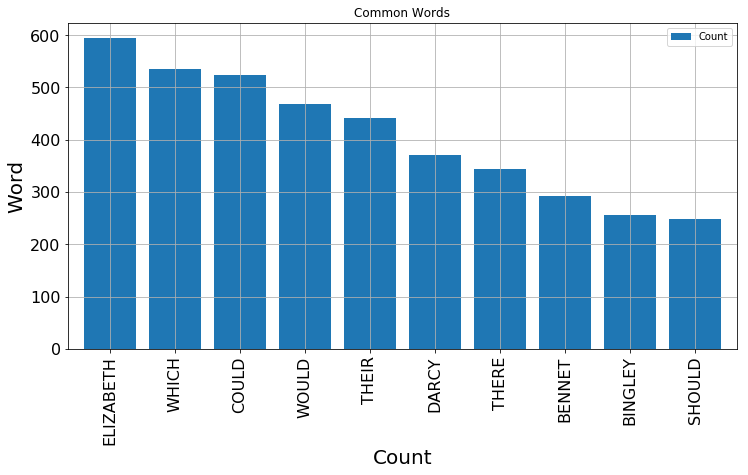

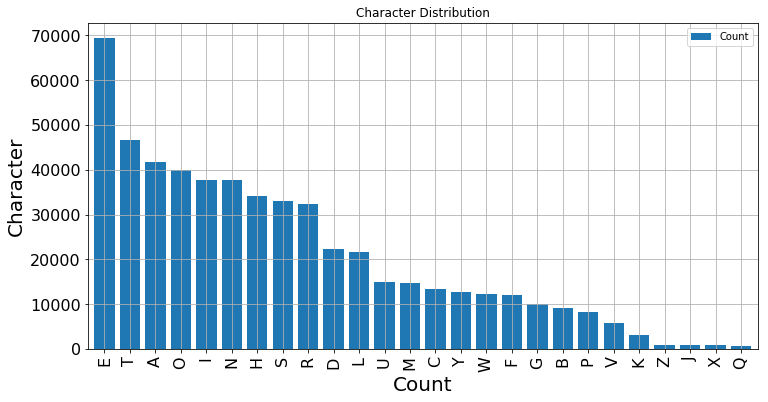

In [16]:
%matplotlib inline
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

ta = TextAnalyzer('pride-and-prejudice.txt', src_type='path')
ta.plot_common_words(minlen=5)
ta.plot_char_distribution(letters_only=True)

## Exam: Using the TextAnalyzer

### Question 1
How many words are in the text of William Henry Harrison's 1841 inaugaral address?
* The address can be found at https://www.webucator.com/how-to/william-henry-harrisons-inaugural-address.cfm.
* Its contents are in a div tag with the id 'content-main'.

In [17]:
#write code here
url = 'https://www.webucator.com/how-to/william-henry-harrisons-inaugural-address.cfm'
ta = TextAnalyzer(url,src_type='url')
ta.set_content_to_tag(tag='div', tag_id='content-main')
print(f'Total word count in {url} is {ta.word_count:,}.')

Total word count in https://www.webucator.com/how-to/william-henry-harrisons-inaugural-address.cfm is 8,430.


### Question 2
What is the least common letter in pride-and-prejudice.txt?

In [18]:
#write code here
path = 'pride-and-prejudice.txt'
ta = TextAnalyzer(path, src_type='path')
char_list_tup = ta.char_distribution(casesensitive=False, letters_only=True)
print(f'Least common letter in {path} is {min(char_list_tup,key=lambda item:item[1])[0]}.')

char_dist_sorted:
 [('Q', 627), ('X', 839), ('J', 871), ('Z', 936), ('K', 3209), ('V', 5726), ('P', 8226), ('B', 9089), ('G', 10033), ('F', 12001), ('W', 12308), ('Y', 12705), ('C', 13461), ('M', 14765), ('U', 14986), ('L', 21592), ('D', 22299), ('R', 32300), ('S', 33110), ('H', 34069), ('N', 37688), ('I', 37830), ('O', 40043), ('A', 41682), ('T', 46645), ('E', 69372)]
Least common letter in pride-and-prejudice.txt is Q.


### Question 3
What is the most common 11-letter word in pride-and-prejudice.txt?  

In [19]:
#write code here
path = 'pride-and-prejudice.txt'
ta = TextAnalyzer(path, src_type='path')
print(f'Most common 11 letter word in {path} is {ta.common_words(minlen=11, maxlen=11, count=1, casesensitive=False)[0][0]}.')

self.minlen: 11
self.maxlen: 11
self.count: 1
self.casesensitive: False
Most common 11 letter word in pride-and-prejudice.txt is NETHERFIELD.


### Question 4
What is the average word length in pride-and-prejudice.txt?

In [20]:
#write code here
path = 'pride-and-prejudice.txt'
ta = TextAnalyzer(path, src_type='path')
# had to move int() out of round() calc to correct TypeError: int object not callable
print(f'Average word length in {path} is: {ta.avg_word_length}') 

Average word length in pride-and-prejudice.txt is: 4.43


### Question 5
How many distinct words are there in pride-and-prejudice.txt?

In [21]:
#write code here
path = 'pride-and-prejudice.txt'
ta = TextAnalyzer(path, src_type='path')
print(f'Distinct word count in {path} is {ta.distinct_word_count:,}.')

Distinct word count in pride-and-prejudice.txt is 6,839.


### Question 6
How many words, ignoring case, are used only once in pride-and-prejudice.txt?

In [24]:
#write code here
# Grader: There are no length restrictions.
path = 'pride-and-prejudice.txt'
ta = TextAnalyzer(path, src_type='path') 
list_tup = ta.common_words(minlen=5,maxlen=10,count=None,casesensitive=False)
print(f'Number of distinct words: {len(list_tup):,}.')
once = []
sum = 0
for item in list_tup:
    for c in item:
        if c == 1:
            sum += 1
            once.append(item)
print(f'Number of words used once in {path} is {sum:,}.')

self.minlen: 5
self.maxlen: 10
self.count: None
self.casesensitive: False
Number of distinct words: 5,135.
Number of words used once in pride-and-prejudice.txt is 2,089.


### Question 7
How many distinct words in pride-and-prejudice.txt have less than five characters, at least one character of which is a capital 'A'.

In [25]:
#write code here
# Grader: Included words with length less than or equal to 5. Your _words() is incorrect. See class.
# See Q8: remove isalpha().
path = 'pride-and-prejudice.txt'
ta = TextAnalyzer(path, src_type='path') 
words = set([w for w in ta._words(casesensitive=True) if w.startswith('A') and len(w) < 5])
print(f"Number of distinct words with 5 or less characters and contain 'A' in {path} is {len(words):,}.\n")
print(words)

Number of distinct words with 5 or less characters and contain 'A' in pride-and-prejudice.txt is 12.

{'Are', 'A', 'An', 'Anne', 'At', 'Ah', 'Away', 'Aye', 'Any', 'All', 'And', 'As'}


### Question 8
A palindrome is a word spelled the same forwards and backwards, like BOB. How many distinct palindromes are there in pride-and-prejudice.txt.
* Only include words with at least three letters.

In [26]:
#write code here
# Grader: isalpha() check is not necessary and makes you miss MA'AM
path = 'pride-and-prejudice.txt'
ta = TextAnalyzer(path, src_type='path') 
_word_list = ta._words(casesensitive=False)
pld = set([w.upper() for w in _word_list if len(w) >= 3 and w.upper() == w[::-1].upper()])  
# :: operator x[::-1] -- every other item in reverse order
print(f"Number of distinct palindromes in {path} with 3 or more characters is {len(pld):,}.")
print(pld)

Number of distinct palindromes in pride-and-prejudice.txt with 3 or more characters is 9.
{'GIG', "MA'AM", 'MADAM', 'PEEP', 'EYE', 'DID', 'ERE', 'SEES', 'NOON'}


### Question 9
What is the positivity rating of 'pride-and-prejudice.txt'

In [27]:
#write code here
path = 'pride-and-prejudice.txt'
ta = TextAnalyzer(path, src_type='path')
print(f'The positivity rating for {path} is {ta.positivity}.') 

# of words in positive.txt is 2,006
# of distinct words in positive.txt is 2,006

# of words in negative.txt is 4,783
# of distinct words in negative.txt is 4,783

# of positive matches: 4,987
# of negative matches: 3,623
Tally of positive - negative matches: 1,364
% positive matches: 57.9%
Positivity score:  11
The positivity rating for pride-and-prejudice.txt is 11.


### Question 10
Which of the following addresses (originally from http://www.inaugural.senate.gov/swearing-in/addresses) has the lowest positivity rating?
1. https://www.webucator.com/how-to/george-bushs-inaugural-address.cfm
1. https://www.webucator.com/how-to/harry-s-trumans-inaugural-address.cfm
1. https://www.webucator.com/how-to/william-mckinleys-inaugural-address.cfm
1. https://www.webucator.com/how-to/zachary-taylors-inaugural-address.cfm

Note the contents of the addresses are in a div tag with the id 'content-main'.

In [28]:
#write code here
url = 'https://www.webucator.com/how-to/george-bushs-inaugural-address.cfm'
ta = TextAnalyzer(url,src_type='url')
ta.set_content_to_tag(tag='div', tag_id='content-main')
print(f'Positivity rating for {url} is {ta.positivity}.')
# store url and positivity rating in dict
pres_pos_dict = {url:ta.positivity}
print(pres_pos_dict)

# of words in positive.txt is 2,006
# of distinct words in positive.txt is 2,006

# of words in negative.txt is 4,783
# of distinct words in negative.txt is 4,783

# of positive matches: 102
# of negative matches: 47
Tally of positive - negative matches: 55
% positive matches: 68.5%
Positivity score:  36
Positivity rating for https://www.webucator.com/how-to/george-bushs-inaugural-address.cfm is 36.
# of words in positive.txt is 2,006
# of distinct words in positive.txt is 2,006

# of words in negative.txt is 4,783
# of distinct words in negative.txt is 4,783

# of positive matches: 102
# of negative matches: 47
Tally of positive - negative matches: 55
% positive matches: 68.5%
Positivity score:  36
{'https://www.webucator.com/how-to/george-bushs-inaugural-address.cfm': 36}


In [29]:
#write code here
url = 'https://www.webucator.com/how-to/harry-s-trumans-inaugural-address.cfm'
ta = TextAnalyzer(url,src_type='url')
ta.set_content_to_tag(tag='div', tag_id='content-main')
print(f'Positivity rating for {url} is {ta.positivity}')
pres_pos_dict.update({url:ta.positivity})
print(pres_pos_dict)

# of words in positive.txt is 2,006
# of distinct words in positive.txt is 2,006

# of words in negative.txt is 4,783
# of distinct words in negative.txt is 4,783

# of positive matches: 144
# of negative matches: 47
Tally of positive - negative matches: 97
% positive matches: 75.4%
Positivity score:  44
Positivity rating for https://www.webucator.com/how-to/harry-s-trumans-inaugural-address.cfm is 44
# of words in positive.txt is 2,006
# of distinct words in positive.txt is 2,006

# of words in negative.txt is 4,783
# of distinct words in negative.txt is 4,783

# of positive matches: 144
# of negative matches: 47
Tally of positive - negative matches: 97
% positive matches: 75.4%
Positivity score:  44
{'https://www.webucator.com/how-to/george-bushs-inaugural-address.cfm': 36, 'https://www.webucator.com/how-to/harry-s-trumans-inaugural-address.cfm': 44}


In [30]:
#write code here
url = 'https://www.webucator.com/how-to/william-mckinleys-inaugural-address.cfm'
ta = TextAnalyzer(url,src_type='url')
ta.set_content_to_tag(tag='div', tag_id='content-main')
print(f'Positivity rating for {url} is {ta.positivity}')
pres_pos_dict.update({url:ta.positivity})
print(pres_pos_dict)

# of words in positive.txt is 2,006
# of distinct words in positive.txt is 2,006

# of words in negative.txt is 4,783
# of distinct words in negative.txt is 4,783

# of positive matches: 116
# of negative matches: 50
Tally of positive - negative matches: 66
% positive matches: 69.9%
Positivity score:  30
Positivity rating for https://www.webucator.com/how-to/william-mckinleys-inaugural-address.cfm is 30
# of words in positive.txt is 2,006
# of distinct words in positive.txt is 2,006

# of words in negative.txt is 4,783
# of distinct words in negative.txt is 4,783

# of positive matches: 116
# of negative matches: 50
Tally of positive - negative matches: 66
% positive matches: 69.9%
Positivity score:  30
{'https://www.webucator.com/how-to/george-bushs-inaugural-address.cfm': 36, 'https://www.webucator.com/how-to/harry-s-trumans-inaugural-address.cfm': 44, 'https://www.webucator.com/how-to/william-mckinleys-inaugural-address.cfm': 30}


In [31]:
#write code here
url = 'https://www.webucator.com/how-to/zachary-taylors-inaugural-address.cfm'
ta = TextAnalyzer(url,src_type='url')
ta.set_content_to_tag(tag='div', tag_id='content-main')
print(f'Positivity rating for {url} is {ta.positivity}')
pres_pos_dict.update({url:ta.positivity})
print(pres_pos_dict)

# of words in positive.txt is 2,006
# of distinct words in positive.txt is 2,006

# of words in negative.txt is 4,783
# of distinct words in negative.txt is 4,783

# of positive matches: 74
# of negative matches: 19
Tally of positive - negative matches: 55
% positive matches: 79.6%
Positivity score:  51
Positivity rating for https://www.webucator.com/how-to/zachary-taylors-inaugural-address.cfm is 51
# of words in positive.txt is 2,006
# of distinct words in positive.txt is 2,006

# of words in negative.txt is 4,783
# of distinct words in negative.txt is 4,783

# of positive matches: 74
# of negative matches: 19
Tally of positive - negative matches: 55
% positive matches: 79.6%
Positivity score:  51
{'https://www.webucator.com/how-to/george-bushs-inaugural-address.cfm': 36, 'https://www.webucator.com/how-to/harry-s-trumans-inaugural-address.cfm': 44, 'https://www.webucator.com/how-to/william-mckinleys-inaugural-address.cfm': 30, 'https://www.webucator.com/how-to/zachary-taylors-inaugur

In [32]:
print(f'The presidential address with the lowest positivity rating is:\n {min(pres_pos_dict, key=pres_pos_dict.get)}.')

The presidential address with the lowest positivity rating is:
 https://www.webucator.com/how-to/william-mckinleys-inaugural-address.cfm.
